# Implementing a Multilayer Perceptron (MNIST)

In [13]:
import torch
import torch.nn as nn

## 2) Loading the dataset

In [20]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [15]:
train_images, train_labels = load_mnist('data/fashion', kind='train')

In [16]:
mean = train_images.mean()
std = train_images.std()

In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=[mean], std=[std])
])

img = train_images[0].reshape(28, 28)
img = transform(img)
img


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [18]:
# train_images = torch.tensor(train_images, dtype=torch.float32)
# train_labels = torch.tensor(train_labels, dtype=torch.int64)

In [19]:
from torch.utils.data import DataLoader, Dataset


class MyDataset(Dataset):
    def __init__(self, path, kind, transform=None):
        self.transform = transform
        
        self.images, self.labels = load_mnist(path, kind)
        
        self.images = torch.tensor(self.images, dtype=torch.float32)
        self.labels = torch.tensor(self.labels, dtype=torch.int64)

        # normalize
        self.images = (self.images - self.images.mean()) / self.images.std()
        
    def __getitem__(self, index):
        img = self.images[index].reshape(1, 784)
        label = self.labels[index]
        
        if self.transform is not None:
            img = self.transform(img)
    
        return img, label

    def __len__(self):
        return self.labels.shape[0]

In [20]:
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[mean], std=[std])
# ])
transform = None
train_dataset = MyDataset(
    'data/fashion', 
    kind='train',
    transform=transform
)

test_dataset = MyDataset(
    'data/fashion',
    kind='t10k',
    transform=transform
)

In [21]:
len(train_dataset)

60000

In [22]:
len(test_dataset)

10000

### Create a validation set

In [23]:
import torch
from torch.utils.data.dataset import random_split

torch.manual_seed(1)
train_dataset, val_dataset = random_split(train_dataset, lengths=[50000, 10000])
print(len(train_dataset), len(val_dataset))

50000 10000


In [24]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
)

In [25]:
for images, labels in train_loader:
    print(images[0])
    # print(labels.shape)
    break

tensor([[-0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103,
         -0.8103, -0.8103, -0.8103, -0.8103,  0.1117,  0.7116,  0.1229,  0.6783,
         -0.0882, -0.8103, -0.8103, -0.8103, -0.7880, -0.8103, -0.8103, -0.8103,
         -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103,
         -0.8103, -0.8103, -0.8103, -0.7991, -0.8103, -0.8103, -0.3992,  0.4561,
          1.3670,  1.3559,  0.7671,  1.5447,  1.3892,  0.3228, -0.4104, -0.8103,
         -0.8103, -0.7991, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103,
         -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103,
         -0.8103,  0.9560,  1.1893,  1.1559,  1.2226,  1.1004,  1.4226,  1.6225,
          1.1782,  1.0226,  1.1004,  0.8449, -0.8103, -0.8103, -0.8103, -0.8103,
         -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103, -0.8103,
         -0.8103, -0.8103, -0.8103, -0.8103, -0.3881,  1.0893,  0.8893,  1.0338,
          1.4114,  1.1893,  

## 3) Implementing the model

In [26]:
import torch

class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_features, 128),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            # 3d hidden layer
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(32, num_classes),
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        logits = self.all_layers(x)
        return logits

## 4) The training loop

In [27]:
def compute_accuracy(model, dataloader):

    model = model.eval()

    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)

        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [28]:
import torch.nn.functional as F

torch.manual_seed(1)
model = PyTorchMLP(num_features=784, num_classes=10)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 30

loss_list = []
train_acc_list, val_acc_list = [], []
for epoch in range(num_epochs):

    model = model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not batch_idx % 250:
            ### LOGGING
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Train Loss: {loss:.2f}"
            )
        loss_list.append(loss.item())
        
    train_acc = compute_accuracy(model, train_loader)
    val_acc = compute_accuracy(model, val_loader)
    print(f"Train Acc {train_acc*100:.2f}% | Val Acc {val_acc*100:.2f}%")
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

Epoch: 001/030 | Batch 000/782 | Train Loss: 2.31
Epoch: 001/030 | Batch 250/782 | Train Loss: 1.53
Epoch: 001/030 | Batch 500/782 | Train Loss: 0.81
Epoch: 001/030 | Batch 750/782 | Train Loss: 0.65
Train Acc 75.22% | Val Acc 75.09%
Epoch: 002/030 | Batch 000/782 | Train Loss: 0.74
Epoch: 002/030 | Batch 250/782 | Train Loss: 0.78
Epoch: 002/030 | Batch 500/782 | Train Loss: 0.38
Epoch: 002/030 | Batch 750/782 | Train Loss: 0.48
Train Acc 80.45% | Val Acc 80.44%
Epoch: 003/030 | Batch 000/782 | Train Loss: 0.47
Epoch: 003/030 | Batch 250/782 | Train Loss: 0.48
Epoch: 003/030 | Batch 500/782 | Train Loss: 0.55
Epoch: 003/030 | Batch 750/782 | Train Loss: 0.46
Train Acc 81.36% | Val Acc 80.91%
Epoch: 004/030 | Batch 000/782 | Train Loss: 0.63
Epoch: 004/030 | Batch 250/782 | Train Loss: 0.51
Epoch: 004/030 | Batch 500/782 | Train Loss: 0.47
Epoch: 004/030 | Batch 750/782 | Train Loss: 0.40
Train Acc 82.99% | Val Acc 82.57%
Epoch: 005/030 | Batch 000/782 | Train Loss: 0.54
Epoch: 005/030

## 5) Evaluating the results

In [29]:
train_acc = compute_accuracy(model, train_loader)
val_acc = compute_accuracy(model, val_loader)
test_acc = compute_accuracy(model, test_loader)

print(f"Train Acc {train_acc*100:.2f}%")
print(f"Val Acc {val_acc*100:.2f}%")
print(f"Test Acc {test_acc*100:.2f}%")

Train Acc 92.08%
Val Acc 88.42%
Test Acc 87.68%


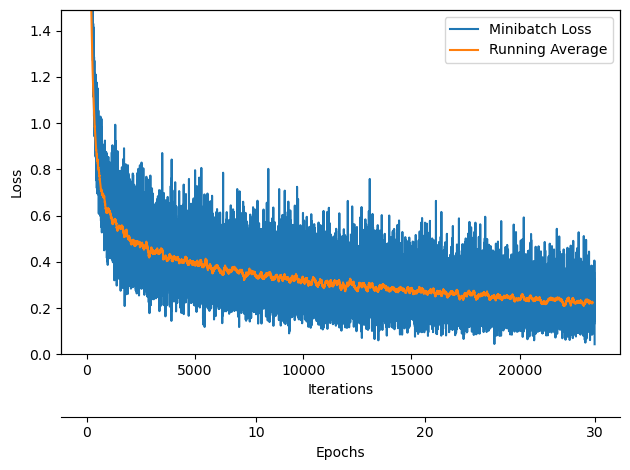

In [30]:
from helper_plotting import plot_training_loss

plot_training_loss(minibatch_loss_list=loss_list,
                   num_epochs=num_epochs,
                   iter_per_epoch=len(loss_list)//num_epochs)

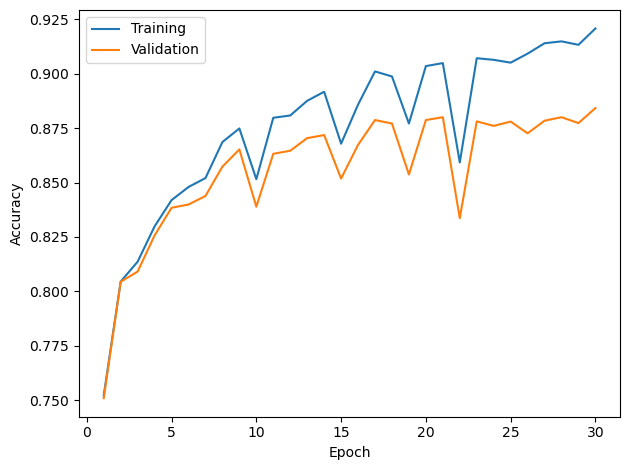

In [31]:
from helper_plotting import plot_accuracy

plot_accuracy(train_acc_list=train_acc_list, valid_acc_list=val_acc_list)

# Now let's try wraping our model with Lightning

In [29]:
import torch
import torch.nn as nn
import lightning as L
import torchmetrics
from lightning.pytorch.tuner import Tuner
from torch.utils.data import DataLoader, Dataset, random_split
from lightning.pytorch.loggers import CSVLogger
import torch.nn.functional as F

In [84]:
class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_features, 128),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            # 3d hidden layer
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(32, num_classes),
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        logits = self.all_layers(x)
        return logits

In [179]:
class LightningModel(L.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

        self.save_hyperparameters(ignore = ['model'])

        self.train_acc = torchmetrics.Accuracy(task = 'multiclass', num_classes=10)
        self.val_acc = torchmetrics.Accuracy(task = 'multiclass', num_classes=10)
        self.test_acc = torchmetrics.Accuracy(task = 'multiclass', num_classes=10)

    def forward(self, x):
        return self.model(x)
    
    def _shared_step(self, batch):
        features, labels = batch
        logits = self(features)

        loss = F.cross_entropy(logits, labels)
        preds = torch.argmax(logits, dim=1)
        return loss, labels, preds
    
    def training_step(self, batch, batch_idx):
        loss, labels, preds = self._shared_step(batch)
        
        self.log('train_loss', loss)
        
        self.train_acc(preds, labels)
        self.log(
            'train_acc', self.train_acc, on_step=False, on_epoch=True, prog_bar=True
        )
        return loss
    
    def validation_step(self, batch, batch_idx):
        loss, labels, preds = self._shared_step(batch)

        self.log('val_loss', loss, prog_bar=True)
        
        self.val_acc(preds, labels)
        self.log('val_acc', self.val_acc, on_step=False, on_epoch=True, prog_bar=True)
    
    def test_step(self, batch, batch_idx):
        _, labels, preds = self._shared_step(batch)

        
        self.test_acc(preds, labels)
        self.log('test_acc', self.test_acc)
    
    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
        sch = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)
        return [optimizer], [sch]
        # return optimizer

# Data Module

In [180]:
class MyDataset(Dataset):
    def __init__(self, path, kind, transform=None):
        self.transform = transform
        
        self.images, self.labels = load_mnist(path, kind)
        
        self.images = torch.tensor(self.images, dtype=torch.float32)
        self.labels = torch.tensor(self.labels, dtype=torch.int64)

        # normalize
        self.images = (self.images - self.images.mean()) / self.images.std()
        
    def __getitem__(self, index):
        img = self.images[index].reshape(1, 784)
        label = self.labels[index]
        
        if self.transform is not None:
            img = self.transform(img)
    
        return img, label

    def __len__(self):
        return self.labels.shape[0]

class FashionMNISTDataModule(L.LightningDataModule):
    def __init__(self, path, batch_size):
        super().__init__()
        self.path = path
        self.batch_size = batch_size

    def prepare_data(self):
        # Download data
        pass

    def setup(self, stage):
        self.train_dataset = MyDataset(self.path, kind = 'train')
        self.test_dataset = MyDataset(self.path, kind = 't10k')

        # split train into train and val
        self.train_dataset, self.val_dataset = random_split(self.train_dataset, [50000, 10000])

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)
    
    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, shuffle=False)
    
    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, shuffle=False)    

In [181]:
L.seed_everything(1)
torch.manual_seed(1)

Global seed set to 1


# Find Learning Rate

In [182]:
pytorch_model = PyTorchMLP(num_features=784, num_classes=10)
lightning_model = LightningModel(pytorch_model, learning_rate=0.01)
dm = FashionMNISTDataModule(path='data/fashion', batch_size=64)

In [183]:
from lightning.pytorch.tuner import Tuner

trainer = L.Trainer(
    max_epochs=40,
    accelerator='cpu',
    devices='auto',
    logger=CSVLogger('logs', name='my-model'),
    deterministic=True,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [184]:
lightning_model.learning_rate

0.01

In [185]:
# tuner = Tuner(trainer)
# lr_finder = tuner.lr_find(lightning_model, dm)
# fig = lr_finder.plot(suggest=True)
# new_lr = lr_finder.suggestion()
# lightning_model.learning_rate = new_lr

In [186]:
trainer.fit(lightning_model, dm)


  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 111 K 
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
111 K     Trainable params
0         Non-trainable params
111 K     Total params
0.445     Total estimated model params size (MB)


Epoch 27: 100%|██████████| 782/782 [00:04<00:00, 168.28it/s, v_num=0, val_loss=0.334, val_acc=0.883, train_acc=0.893]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")

aggreg_metrics = []
agg_col = "epoch"
for i, dfg in metrics.groupby(agg_col):
    agg = dict(dfg.mean())
    agg[agg_col] = i
    aggreg_metrics.append(agg)

df_metrics = pd.DataFrame(aggreg_metrics)
df_metrics[["train_loss", "val_loss"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)


plt.savefig(f"loss.png")

df_metrics[["train_acc", "val_acc"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="ACC"
)

plt.savefig(f"acc.png")

plt.show()

In [137]:
trainer.test(model=lightning_model, dataloaders=dm)

/Users/alimtleuliyev/anaconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 157/157 [00:00<00:00, 292.51it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8774999976158142     │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.8774999976158142}]

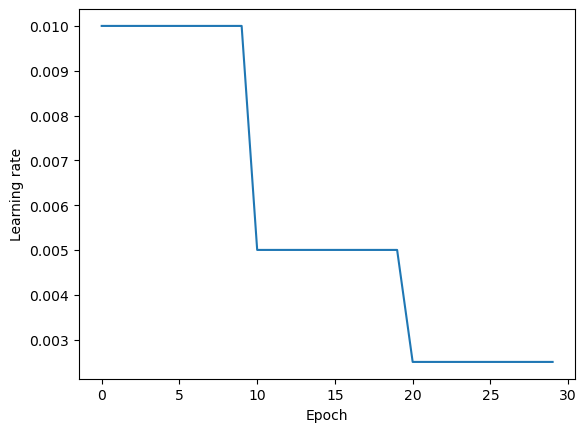

In [140]:
import matplotlib.pyplot as plt
opt = torch.optim.SGD(pytorch_model.parameters(), lr=0.01)
sch = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.5)


lrs = []
max_epochs = 30

for epoch in range(max_epochs):
    opt.step()
    lrs.append(opt.param_groups[0]["lr"])
    sch.step()

plt.plot(range(max_epochs), lrs)
plt.xlabel('Epoch')
plt.ylabel('Learning rate')

#plt.savefig('steps.pdf')
plt.show()